In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("data/diabetic_data.csv")

In [29]:
list(df.columns.values)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [51]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [84]:
# data cleaning

# pt 1: demographic vars
df.loc[df.weight == '?', 'weight'] = np.NaN

df.loc[df.race == 'Caucasian', 'race'] = 'Cau'
df.loc[df.race == 'AfricanAmerican', 'race'] = 'Aa'
df.loc[df.race == '?', 'race'] = np.NaN

df.loc[df.gender == 'Male', 'gender'] = 'M'
df.loc[df.gender == 'Female', 'gender'] = 'F'

# pt 2: medications
df.loc[df.change == 'No', 'change'] = 0
df.loc[df.change == 'Ch', 'change'] = 1
df.loc[df.diabetesMed == 'No', 'diabetesMed'] = 0
df.loc[df.diabetesMed == 'Yes', 'diabetesMed'] = 1
df.loc[df.acetohexamide == 'Steady', 'acetohexamide'] = 1
df.loc[df.acetohexamide == 'No', 'acetohexamide'] = 0

# drop all columns that have same value 
df.drop(['examide'], axis = 1, inplace = True)
df.drop(['citoglipton'], axis = 1, inplace = True)

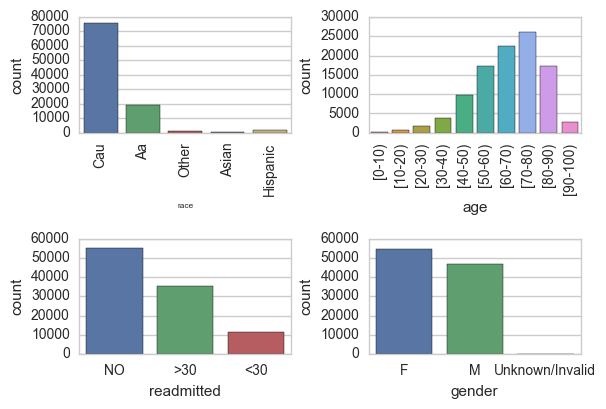

In [88]:
sns.set(style="whitegrid")
plt.subplot(2,2,1)
ax = sns.countplot(x="race", data=df)
plt.xlabel('race', fontsize=6)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
ax = sns.countplot(x="age", data=df)
plt.xticks(rotation=90)
plt.subplot(2,2,3)
ax = sns.countplot(x="readmitted", data=df)
plt.subplot(2,2,4)
ax = sns.countplot(x="gender", data=df)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()